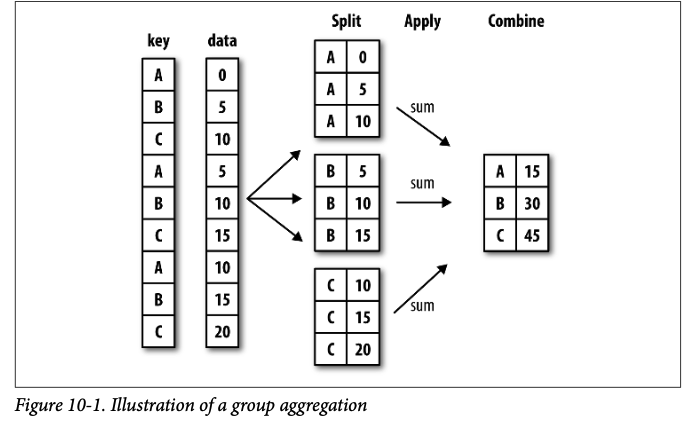

In [2]:
import pandas as pd
import numpy as np

In [89]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
'key2' : ['one', 'two', 'one', 'two', 'one'],
'data1' : np.random.randn(5),
'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-1.145261,0.063233
1,a,two,-0.135808,0.186986
2,b,one,1.021706,1.442588
3,b,two,-1.037443,0.784260
4,a,one,0.132553,1.819181


In [5]:
#getting the mean of data1 on key1 column


grouped= df['data1'].groupby(df['key1'])  #this stage is split stage that produces a groupby object

grouped

In [6]:
grouped.mean() # this is the apply and combine stage

key1
a    0.020616
b   -0.795250
Name: data1, dtype: float64

In [8]:
df['data1'].groupby([df['key1'], df['key2']]).mean().unstack()

key2,one,two
key1,,
a,0.449813,-0.837777
b,0.061552,-1.652053


In [10]:
df

,key1,key2,data1,data2
0,a,one,0.294545,0.249580
1,a,two,-0.837777,-0.190070
2,b,one,0.061552,-1.670098
3,b,two,-1.652053,0.569874
4,a,one,0.605080,-0.298979


In [13]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

df['data1'].groupby([states,years]).mean()


# this is different. The states and years maps to the index of the df. The length of the array must match the length of the axis in the datframe for this to be possible

California  2005   -0.837777
            2006    0.061552
Ohio        2005   -0.678754
            2006    0.605080
Name: data1, dtype: float64

In [18]:
df

,key1,key2,data1,data2
0,a,one,0.294545,0.249580
1,a,two,-0.837777,-0.190070
2,b,one,0.061552,-1.670098
3,b,two,-1.652053,0.569874
4,a,one,0.605080,-0.298979


In [26]:
df['data1'].groupby(df['key1']).mean()

key1
a    0.020616
b   -0.795250
Name: data1, dtype: float64

In [27]:
df.groupby('key1').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [28]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.449813 -0.024700
     two  -0.837777 -0.190070
b    one   0.061552 -1.670098
     two  -1.652053  0.569874

In [33]:
df.groupby('key1').mean(numeric_only= True)

,data1,data2
key1,,
a,0.020616,-0.079823
b,-0.795250,-0.550112


In [32]:
import numpy as np
import pandas as pd
data = {'planet': ['Mercury', 'Venus', 'Earth', 'Mars',
                   'Jupiter', 'Saturn', 'Uranus', 'Neptune'],
        'radius_km': [2440, 6052, 6371, 3390, 69911, 58232,
                     25362, 24622],
        'moons': [0, 0, 1, 2, 80, 83, 27, 14],
        'type': ['terrestrial', 'terrestrial', 'terrestrial', 'terrestrial',
                 'gas giant', 'gas giant', 'ice giant', 'ice giant'],
        'rings': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes','yes'],
        'mean_temp_c': [167, 464, 15, -65, -110, -140, -195, -200],
        'magnetic_field': ['yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes']
        }
planets = pd.DataFrame(data)
planets
planets.groupby(['type', 'magnetic_field']).mean(numeric_only= True)

radius_km  moons  mean_temp_c
type        magnetic_field                               
gas giant   yes               64071.5   81.5       -125.0
ice giant   yes               24992.0   20.5       -197.5
terrestrial no                 4721.0    1.0        199.5
            yes                4405.5    0.5         91.0

Iterating over groups

In [34]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.294545  0.249580
1    a  two -0.837777 -0.190070
4    a  one  0.605080 -0.298979
b
  key1 key2     data1     data2
2    b  one  0.061552 -1.670098
3    b  two -1.652053  0.569874


In [36]:
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.294545  0.249580
4    a  one  0.605080 -0.298979
('a', 'two')
  key1 key2     data1    data2
1    a  two -0.837777 -0.19007
('b', 'one')
  key1 key2     data1     data2
2    b  one  0.061552 -1.670098
('b', 'two')
  key1 key2     data1     data2
3    b  two -1.652053  0.569874


In [37]:
pieces= list(df.groupby('key1'))
pieces

[('a',
    key1 key2     data1     data2
  0    a  one  0.294545  0.249580
  1    a  two -0.837777 -0.190070
  4    a  one  0.605080 -0.298979),
 ('b',
    key1 key2     data1     data2
  2    b  one  0.061552 -1.670098
  3    b  two -1.652053  0.569874)]

In [38]:
pieces= dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one  0.294545  0.249580
 1    a  two -0.837777 -0.190070
 4    a  one  0.605080 -0.298979,
 'b':   key1 key2     data1     data2
 2    b  one  0.061552 -1.670098
 3    b  two -1.652053  0.569874}

In [40]:
for name , group in df.groupby(df.dtypes,axis=1):
    print(name)
    print(group)

float64
      data1     data2
0  0.294545  0.249580
1 -0.837777 -0.190070
2  0.061552 -1.670098
3 -1.652053  0.569874
4  0.605080 -0.298979
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/2069378948.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  for name , group in df.groupby(df.dtypes,axis=1):


Selecting a column and subset of Columns

In [43]:
df.groupby('key1')['data1']  # df['data1'] .groupby(df['key1'])  Prefer the first
df.groupby('key1')['data2']  # df['data2'] .groupby(df['key1'])  Prefer the first


# Especially for large datasets, it may be desirable to aggregate only a few columns.

In [45]:
df.groupby('key1') #this works but the below doesn't
# df['data1'].groupby('key1')

In [47]:
df['data1'] .groupby(df['key1'])

In [48]:
df.groupby('key1')['data1'].sum()

key1
a    0.061848
b   -1.590501
Name: data1, dtype: float64

In [49]:
df.groupby(['key1', 'key2'])['data1'].sum()

key1  key2
a     one     0.899625
      two    -0.837777
b     one     0.061552
      two    -1.652053
Name: data1, dtype: float64

GROUPING WITH DICT AND SERIES

In [50]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

people

,a,b,c,d,e
Joe,-1.641356,1.292909,0.060705,-0.344778,-0.711897
Steve,0.196897,1.271158,0.220066,-0.688747,1.638142
Wes,0.800129,0.532747,-1.854231,-0.482635,-0.510276
Jim,-1.419001,-1.092693,-2.352440,0.310969,1.150035
Travis,0.747427,0.081851,-1.064061,0.728169,1.150482


In [53]:
people.iloc[2:3, [1,2]]= np.nan

In [54]:
people

,a,b,c,d,e
Joe,-1.641356,1.292909,0.060705,-0.344778,-0.711897
Steve,0.196897,1.271158,0.220066,-0.688747,1.638142
Wes,0.800129,NaN,NaN,-0.482635,-0.510276
Jim,-1.419001,-1.092693,-2.352440,0.310969,1.150035
Travis,0.747427,0.081851,-1.064061,0.728169,1.150482


In [55]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
               'd': 'blue', 'e': 'red', 'f' : 'orange'}

by_columnn_groups= people.groupby(mapping, axis= 1)
by_columnn_groups.sum()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/713154963.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  by_columnn_groups= people.groupby(mapping, axis= 1)


,blue,red
Joe,-0.284073,-1.060345
Steve,-0.468681,3.106197
Wes,-0.482635,0.289852
Jim,-2.041471,-1.361659
Travis,-0.335892,1.979760


In [56]:
#instead of using dictionary, series can also be used 

map_series= pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [60]:
by_columnn_groups= people.groupby(map_series,axis=1)
by_columnn_groups.sum()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/2591633947.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  by_columnn_groups= people.groupby(map_series,axis=1)


,blue,red
Joe,-0.284073,-1.060345
Steve,-0.468681,3.106197
Wes,-0.482635,0.289852
Jim,-2.041471,-1.361659
Travis,-0.335892,1.979760


Grouping with Functions

In [61]:
for name,group in people.groupby(len):
    print(name)
    print(group)

3
            a         b         c         d         e
Joe -1.641356  1.292909  0.060705 -0.344778 -0.711897
Wes  0.800129       NaN       NaN -0.482635 -0.510276
Jim -1.419001 -1.092693 -2.352440  0.310969  1.150035
5
              a         b         c         d         e
Steve  0.196897  1.271158  0.220066 -0.688747  1.638142
6
               a         b         c         d         e
Travis  0.747427  0.081851 -1.064061  0.728169  1.150482


In [62]:
people.groupby(len).mean()

,a,b,c,d,e
3,-0.753409,0.100108,-1.145868,-0.172148,-0.024046
5,0.196897,1.271158,0.220066,-0.688747,1.638142
6,0.747427,0.081851,-1.064061,0.728169,1.150482


In [63]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.641356  1.292909  0.060705 -0.482635 -0.711897
  two -1.419001 -1.092693 -2.352440  0.310969  1.150035
5 one  0.196897  1.271158  0.220066 -0.688747  1.638142
6 two  0.747427  0.081851 -1.064061  0.728169  1.150482

In [86]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                           [1, 3, 5, 1, 3]],
                                          names=['cty', 'tenor'])

index = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP'],
                                           [1, 3, 5, 1]],
                                          names=['l1', 'l2'])


hier_df= pd.DataFrame(np.random.randn(4,5), columns=columns,index= index)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
l1 l2                                                  
US 1  -0.673069 -0.035890  0.552842 -1.039179 -0.563797
   3  -0.074854  2.324583  0.220360  0.382069 -0.215424
   5  -0.711863 -0.994135 -0.095828 -0.475188 -0.739851
JP 1   0.447681  0.862351 -1.458504  0.463589  0.362344

In [67]:
hier_df.groupby(level= 'cty',axis=1).sum()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/151755903.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  hier_df.groupby(level= 'cty',axis=1).sum()


cty,JP,US
0,0.487709,0.473466
1,-0.796912,1.188038
2,-0.083134,2.321188
3,1.246269,-0.551153


In [87]:
hier_df.groupby(level= 'l1',axis=0).sum()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/1627631565.py:1: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  hier_df.groupby(level= 'l1',axis=0).sum()


cty          US                            JP          
tenor         1         3         5         1         3
l1                                                     
JP     0.447681  0.862351 -1.458504  0.463589  0.362344
US    -1.459786  1.294558  0.677374 -1.132298 -1.519071

In [73]:
hier_df.groupby(df.index).sum() #this does not work, directly use sum() without group by

ValueError: Grouper and axis must be same length

In [83]:

# Create the DataFrame
data = {'a': [-1.641356, 0.196897, 0.800129, -1.419001, 0.747427],
        'b': [1.292909, 1.271158, 0.532747, -1.092693, 0.081851],
        'c': [0.060705, 0.220066, -1.854231, -2.352440, -1.064061],
        'd': [-0.344778, -0.688747, -0.482635, 0.310969, 0.728169],
        'e': [-0.711897, 1.638142, -0.510276, 1.150035, 1.150482]}
index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
df = pd.DataFrame(data, index=index)

# Group by index
for name, group in df.groupby(df.index, axis=0):
    print(name)
    print(group)



Jim
            a         b        c         d         e
Jim -1.419001 -1.092693 -2.35244  0.310969  1.150035
Joe
            a         b         c         d         e
Joe -1.641356  1.292909  0.060705 -0.344778 -0.711897
Steve
              a         b         c         d         e
Steve  0.196897  1.271158  0.220066 -0.688747  1.638142
Travis
               a         b         c         d         e
Travis  0.747427  0.081851 -1.064061  0.728169  1.150482
Wes
            a         b         c         d         e
Wes  0.800129  0.532747 -1.854231 -0.482635 -0.510276


/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/2522538622.py:11: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  for name, group in df.groupby(df.index, axis=0):


In [76]:
data = {'a': [-1.641356, 0.196897, 0.800129, -1.419001, 0.747427],
        'b': [1.292909, 1.271158, 0.532747, -1.092693, 0.081851],
        'c': [0.060705, 0.220066, -1.854231, -2.352440, -1.064061],
        'd': [-0.344778, -0.688747, -0.482635, 0.310969, 0.728169],
        'e': [-0.711897, 1.638142, -0.510276, 1.150035, 1.150482]}
index = ['Joe', 'Steve', 'Wes', 'Jim', 'Travis']
df = pd.DataFrame(data, index=index)

df

,a,b,c,d,e
Joe,-1.641356,1.292909,0.060705,-0.344778,-0.711897
Steve,0.196897,1.271158,0.220066,-0.688747,1.638142
Wes,0.800129,0.532747,-1.854231,-0.482635,-0.510276
Jim,-1.419001,-1.092693,-2.352440,0.310969,1.150035
Travis,0.747427,0.081851,-1.064061,0.728169,1.150482


In [80]:
df.sum(axis=1)

Joe      -1.344417
Steve     2.637516
Wes      -1.514266
Jim      -3.403130
Travis    1.643868
dtype: float64

DATA Aggregation

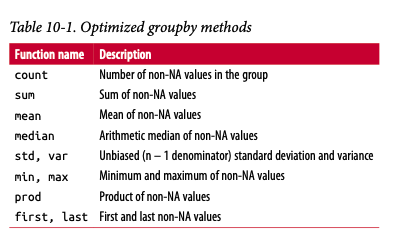

In [90]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
'key2' : ['one', 'two', 'one', 'two', 'one'],
'data1' : np.random.randn(5),
'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.224902,0.401745
1,a,two,1.183566,-0.368410
2,b,one,1.322079,2.914432
3,b,two,-1.259256,2.676022
4,a,one,-0.559635,-0.954622


In [91]:
grouped= df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.991834
b    1.063945
Name: data1, dtype: float64

In [102]:
def peak_to_peak(arr):
    return arr.max()-arr.min()


grouped[['data1', 'data2']].agg(peak_to_peak) 

,data1,data2
key1,,
a,1.743201,1.356368
b,2.581335,0.238410


In [103]:
df.groupby('key1').mean(numeric_only= True)

,data1,data2
key1,,
a,0.282945,-0.307096
b,0.031411,2.795227


In [105]:
grouped[['data1', 'data2']].agg(peak_to_peak,numeric_only= True)  #numeric_only does not work here

TypeError: peak_to_peak() got an unexpected keyword argument 'numeric_only'

In [106]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.282945  0.873049 -0.559635 -0.167366  0.224902  0.704234   
b      2.0  0.031411  1.825280 -1.259256 -0.613922  0.031411  0.676745   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.183566   3.0 -0.307096  0.680259 -0.954622 -0.661516 -0.368410   
b     1.322079   2.0  2.795227  0.168581  2.676022  2.735624  2.795227   

                          
           75%       max  
key1                      
a     0.016668  0.401745  
b     2.854829  2.914432

In [107]:
tip_data = pd.read_csv('example_files/tips.csv')
tip_data

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [108]:
tip_data['tip_percent']= tip_data['tip']/tip_data['total_bill']

In [109]:
tip_data

,total_bill,tip,smoker,day,time,size,tip_percent
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [110]:
grouped =tip_data.groupby(['day','smoker'])  
grouped['tip_percent'].agg(['mean', 'std', peak_to_peak])  

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [112]:
grouped['tip_percent'].agg([('foo', 'mean'),('bar', 'std')])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

Applying multiple functions on multiple columns

In [118]:
functions= ['min', 'max', 'std']

grouped[['tip', 'tip_percent']].agg(['min', 'max', 'std'])

tip                  tip_percent                    
              min    max       std         min       max       std
day  smoker                                                       
Fri  No      1.50   3.50  0.898494    0.120385  0.187735  0.028123
     Yes     1.00   4.73  1.077668    0.103555  0.263480  0.051293
Sat  No      1.00   9.00  1.642088    0.056797  0.291990  0.039767
     Yes     1.00  10.00  1.630580    0.035638  0.325733  0.061375
Sun  No      1.01   6.00  1.224785    0.059447  0.252672  0.042347
     Yes     1.50   6.50  1.261151    0.065660  0.710345  0.154134
Thur No      1.25   6.70  1.282964    0.072961  0.266312  0.038774
     Yes     2.00   5.00  1.113491    0.090014  0.241255  0.039389

In [120]:
# If we want to add names to the colums generated

ftuple= [('apply1', 'mean'), ('apply2', 'min')]

grouped[['tip', 'tip_percent']].agg(ftuple)

tip        tip_percent          
               apply1 apply2      apply1    apply2
day  smoker                                       
Fri  No      2.812500   1.50    0.151650  0.120385
     Yes     2.714000   1.00    0.174783  0.103555
Sat  No      3.102889   1.00    0.158048  0.056797
     Yes     2.875476   1.00    0.147906  0.035638
Sun  No      3.167895   1.01    0.160113  0.059447
     Yes     3.516842   1.50    0.187250  0.065660
Thur No      2.673778   1.25    0.160298  0.072961
     Yes     3.030000   2.00    0.163863  0.090014

In [121]:
#if we want to apply different function to different columns


grouped.agg({'tip': ['mean', np.std], 'tip_percent':'max'})

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/2843610264.py:4: FutureWarning: The provided callable <function std at 0x1040c6670> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  grouped.agg({'tip': ['mean', np.std], 'tip_percent':'max'})


tip           tip_percent
                 mean       std         max
day  smoker                                
Fri  No      2.812500  0.898494    0.187735
     Yes     2.714000  1.077668    0.263480
Sat  No      3.102889  1.642088    0.291990
     Yes     2.875476  1.630580    0.325733
Sun  No      3.167895  1.224785    0.252672
     Yes     3.516842  1.261151    0.710345
Thur No      2.673778  1.282964    0.266312
     Yes     3.030000  1.113491    0.241255

In [127]:
tip_data.groupby(['day', 'smoker'], as_index=False).mean(numeric_only= True)

,day,smoker,total_bill,tip,size,tip_percent
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


In [128]:
#get top 5 items

def get_top_5(df, n=5, column= 'tip'):
    return df.sort_values(by= column)[:5]

In [129]:
get_top_5(tip_data,n=6)

,total_bill,tip,smoker,day,time,size,tip_percent
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
236,12.60,1.00,Yes,Sat,Dinner,2,0.079365
92,5.75,1.00,Yes,Fri,Dinner,2,0.173913
111,7.25,1.00,No,Sat,Dinner,1,0.137931
0,16.99,1.01,No,Sun,Dinner,2,0.059447


In [130]:
tip_data.groupby('smoker').apply(get_top_5)

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/1312324479.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tip_data.groupby('smoker').apply(get_top_5)


total_bill   tip smoker   day    time  size  tip_percent
smoker                                                              
No     111        7.25  1.00     No   Sat  Dinner     1     0.137931
       0         16.99  1.01     No   Sun  Dinner     2     0.059447
       235       10.07  1.25     No   Sat  Dinner     2     0.124131
       135        8.51  1.25     No  Thur   Lunch     2     0.146886
       75        10.51  1.25     No   Sat  Dinner     2     0.118934
Yes    92         5.75  1.00    Yes   Fri  Dinner     2     0.173913
       236       12.60  1.00    Yes   Sat  Dinner     2     0.079365
       67         3.07  1.00    Yes   Sat  Dinner     1     0.325733
       215       12.90  1.10    Yes   Sat  Dinner     2     0.085271
       237       32.83  1.17    Yes   Sat  Dinner     2     0.035638

In [133]:
tip_data.groupby(['smoker', 'day']).apply(get_top_5, n=1, column='total_bill')

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/2703048840.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tip_data.groupby(['smoker', 'day']).apply(get_top_5, n=1, column='total_bill')


total_bill   tip smoker   day    time  size  tip_percent
smoker day                                                               
No     Fri  99        12.46  1.50     No   Fri  Dinner     2     0.120385
            223       15.98  3.00     No   Fri   Lunch     3     0.187735
            91        22.49  3.50     No   Fri  Dinner     2     0.155625
            94        22.75  3.25     No   Fri  Dinner     2     0.142857
       Sat  111        7.25  1.00     No   Sat  Dinner     1     0.137931
            30         9.55  1.45     No   Sat  Dinner     2     0.151832
            235       10.07  1.25     No   Sat  Dinner     2     0.124131
            75        10.51  1.25     No   Sat  Dinner     2     0.118934
            233       10.77  1.47     No   Sat  Dinner     2     0.136490
       Sun  6          8.77  2.00     No   Sun  Dinner     2     0.228050
            43         9.68  1.32     No   Sun  Dinner     2     0.136364
            53         9.94  1.56     No   Sun  Dinner     2     0.156942
            10        10.27  1.71     No   Sun  Dinner     2     0.166504
            51        10.29  2.60     No   Sun  Dinner     2     0.252672
       Thur 149        7.51  2.00     No  Thur   Lunch     2     0.266312
            195        7.56  1.44     No  Thur   Lunch     2     0.190476
            145        8.35  1.50     No  Thur   Lunch     2     0.179641
            135        8.51  1.25     No  Thur   Lunch     2     0.146886
            126        8.52  1.48     No  Thur   Lunch     2     0.173709
Yes    Fri  92         5.75  1.00    Yes   Fri  Dinner     2     0.173913
            222        8.58  1.92    Yes   Fri   Lunch     1     0.223776
            226       10.09  2.00    Yes   Fri   Lunch     2     0.198216
            100       11.35  2.50    Yes   Fri  Dinner     2     0.220264
            97        12.03  1.50    Yes   Fri  Dinner     2     0.124688
       Sat  67         3.07  1.00    Yes   Sat  Dinner     1     0.325733
            218        7.74  1.44    Yes   Sat  Dinner     2     0.186047
            168       10.59  1.61    Yes   Sat  Dinner     2     0.152030
            169       10.63  2.00    Yes   Sat  Dinner     2     0.188147
            62        11.02  1.98    Yes   Sat  Dinner     2     0.179673
       Sun  172        7.25  5.15    Yes   Sun  Dinner     2     0.710345
            178        9.60  4.00    Yes   Sun  Dinner     2     0.416667
            177       14.48  2.00    Yes   Sun  Dinner     2     0.138122
            190       15.69  1.50    Yes   Sun  Dinner     2     0.095602
            174       16.82  4.00    Yes   Sun  Dinner     2     0.237812
       Thur 196       10.34  2.00    Yes  Thur   Lunch     2     0.193424
            201       12.74  2.01    Yes  Thur   Lunch     2     0.157771
            202       13.00  2.00    Yes  Thur   Lunch     2     0.153846
            198       13.00  2.00    Yes  Thur   Lunch     2     0.153846
            199       13.51  2.00    Yes  Thur   Lunch     2     0.148038

#Supressing the Group Keys

In [134]:
tip_data.groupby(['smoker'], group_keys= False).apply(get_top_5, n=1, column='total_bill')

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/3713360847.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tip_data.groupby(['smoker'], group_keys= False).apply(get_top_5, n=1, column='total_bill')


,total_bill,tip,smoker,day,time,size,tip_percent
111,7.25,1.00,No,Sat,Dinner,1,0.137931
149,7.51,2.00,No,Thur,Lunch,2,0.266312
195,7.56,1.44,No,Thur,Lunch,2,0.190476
145,8.35,1.50,No,Thur,Lunch,2,0.179641
135,8.51,1.25,No,Thur,Lunch,2,0.146886
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
92,5.75,1.00,Yes,Fri,Dinner,2,0.173913
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
218,7.74,1.44,Yes,Sat,Dinner,2,0.186047
222,8.58,1.92,Yes,Fri,Lunch,1,0.223776


Quantile and Bucket Analysis

In [135]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})

In [136]:
frame

,data1,data2
0,0.315136,0.252119
1,-0.886566,1.517630
2,-0.749020,-1.108663
3,-0.870612,0.691180
4,0.209573,1.299455
...,...,...
995,-1.953015,-1.703401
996,2.226842,-0.486656
997,1.292464,0.096660
998,-1.194589,-1.793785


In [140]:
quartiles=pd.cut(frame.data1, 4)

In [143]:
frame.groupby(quartiles).agg(['mean', 'max'])

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/3688197002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frame.groupby(quartiles).agg(['mean', 'max'])


data1               data2          
                      mean       max      mean       max
data1                                                   
(-3.632, -1.961] -2.294017 -1.962864  0.093419  1.612604
(-1.961, -0.296] -0.922931 -0.297257  0.137331  3.082112
(-0.296, 1.369]   0.454746  1.356834  0.025166  2.748928
(1.369, 3.033]    1.856157  3.033483 -0.183920  2.611314

In [149]:
def get_stats(group):
    return {'mon':group.min(), 'max': group.max(), 'mean':group.mean()}

In [150]:
frame.data1.groupby(quartiles).apply(get_stats).unstack()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/1749977112.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frame.data1.groupby(quartiles).apply(get_stats).unstack()


,mon,max,mean
data1,,,
"(-3.632, -1.961]",-3.625328,-1.962864,-2.294017
"(-1.961, -0.296]",-1.959894,-0.297257,-0.922931
"(-0.296, 1.369]",-0.292811,1.356834,0.454746
"(1.369, 3.033]",1.395237,3.033483,1.856157


In [153]:
s= pd.Series(np.random.randn(6))

In [154]:
s[[2,5]]= np.nan
s

0   -0.528385
1   -0.631209
2         NaN
3    0.866922
4   -0.074848
5         NaN
dtype: float64

In [156]:
s.fillna(s.mean())

0   -0.528385
1   -0.631209
2   -0.091880
3    0.866922
4   -0.074848
5   -0.091880
dtype: float64

In [157]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

Ohio         -1.555526
New York      0.004488
Vermont      -3.089810
Florida      -0.170183
Oregon       -0.301213
Nevada        1.018207
California   -0.817776
Idaho         1.680353
dtype: float64

In [164]:
data[[2,6]]= np.nan
data

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/1252658811.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  data[[2,6]]= np.nan


Ohio         -1.555526
New York      0.004488
Vermont            NaN
Florida      -0.170183
Oregon       -0.301213
Nevada        1.018207
California         NaN
Idaho         1.680353
dtype: float64

In [165]:
data.groupby(group_key).mean()

East   -0.573740
West    0.799116
dtype: float64

In [166]:
fill_mean= lambda g:g.fillna(g.mean())


data.groupby(group_key).apply(fill_mean)

East  Ohio         -1.555526
      New York      0.004488
      Vermont      -0.573740
      Florida      -0.170183
West  Oregon       -0.301213
      Nevada        1.018207
      California    0.799116
      Idaho         1.680353
dtype: float64

In [172]:
#fill values with a specific value

fill_values= {'East': 0.5, 'West':999999}

fill = lambda group: group.fillna(fill_values[group.name])  #How is group.name working?????

data.groupby(group_key).apply(fill)

East  Ohio              -1.555526
      New York           0.004488
      Vermont            0.500000
      Florida           -0.170183
West  Oregon            -0.301213
      Nevada             1.018207
      California    999999.000000
      Idaho              1.680353
dtype: float64

In [171]:
for x, y in data.groupby(group_key):
    print(x)
    print(y)

East
Ohio       -1.555526
New York    0.004488
Vermont          NaN
Florida    -0.170183
dtype: float64
West
Oregon       -0.301213
Nevada        1.018207
California         NaN
Idaho         1.680353
dtype: float64


In [176]:
grouped= data.groupby(group_key)

In [177]:
fill_values['East']

0.5

Example: Random Sampling and Permutation

In [189]:
suits = ['H', 'S', 'C', 'D']
card_values=(list(range(1,11)) +[10]*3)*4

base_names = ['A'] + list(range(2,11)) + ['J', 'K', 'Q']

In [190]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']

In [194]:
cards= []
for item in suits:
    cards.extend(str(num) + str(item) for num in base_names)

In [196]:
deck= pd.Series(card_values, index=cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [201]:
# Drawing 5 sampke randomly
def draw(deck,n=5):
    return deck.sample(n)


draw(deck)

4D      4
JC     10
10S    10
7S      7
3S      3
dtype: int64

In [204]:
#drawing 5 smaples from each group

group_key= ['H']*13+['S']*13+['C']*13+['D']*13
deck.groupby(group_key).apply(draw)

C  2C      2
   9C      9
   7C      7
   8C      8
   KC     10
D  7D      7
   JD     10
   8D      8
   QD     10
   KD     10
H  2H      2
   4H      4
   9H      9
   AH      1
   KH     10
S  10S    10
   8S      8
   7S      7
   3S      3
   9S      9
dtype: int64

In [210]:
card[-1]

NameError: name 'card' is not defined

In [212]:
get_suit = lambda card: card[-1]

In [219]:
deck.index[0][-1]

'H'

In [220]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  6C      6
   2C      2
D  10D    10
   QD     10
H  QH     10
   2H      2
S  QS     10
   10S    10
dtype: int64

In [221]:
#group weighted avg and correlation


df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
'b', 'b', 'b', 'b'],
'data': np.random.randn(8),
'weights': np.random.rand(8)})


,category,data,weights
0,a,-0.420450,0.013040
1,a,0.010828,0.094541
2,a,-0.748791,0.116971
3,a,-0.727990,0.060134
4,b,0.871925,0.773045
5,b,0.266989,0.980157
6,b,1.099813,0.181347
7,b,-0.522207,0.309581


In [233]:
get_wavg = lambda g: np.average(g['data'], weights= g['weights'])

df.groupby('category').apply(get_wavg)

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_51473/3326642648.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('category').apply(get_wavg)


category
a   -0.477097
b    0.433803
dtype: float64

In [228]:
df.mean()

TypeError: Could not convert ['aaaabbbb'] to numeric

In [236]:
close_px= pd.read_csv('example_files/stock_px.csv', parse_dates=True, index_col= 0)   
close_px


,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [239]:
spx_corr = lambda x:x.corrwith(x['SPX'])
get_year = lambda date: date.year

In [238]:
ret=close_px.pct_change().dropna()

In [240]:
by_year= ret.groupby(get_year)

In [241]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


10.4 Pivot Tables and Cross-Tabulation

In [242]:
tip_data

,total_bill,tip,smoker,day,time,size,tip_percent
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


In [256]:
tip_data.groupby(['day',  'smoker']).mean(numeric_only= True)

total_bill       tip      size  tip_percent
day  smoker                                             
Fri  No       18.420000  2.812500  2.250000     0.151650
     Yes      16.813333  2.714000  2.066667     0.174783
Sat  No       19.661778  3.102889  2.555556     0.158048
     Yes      21.276667  2.875476  2.476190     0.147906
Sun  No       20.506667  3.167895  2.929825     0.160113
     Yes      24.120000  3.516842  2.578947     0.187250
Thur No       17.113111  2.673778  2.488889     0.160298
     Yes      19.190588  3.030000  2.352941     0.163863

In [249]:
tip_data.groupby(['day',  'time','smoker']).mean(numeric_only= True).unstack()

total_bill                  tip                size            \
smoker              No        Yes        No       Yes        No       Yes   
day  time                                                                   
Fri  Dinner  19.233333  19.806667  2.750000  3.003333  2.000000  2.222222   
     Lunch   15.980000  12.323333  3.000000  2.280000  3.000000  1.833333   
Sat  Dinner  19.661778  21.276667  3.102889  2.875476  2.555556  2.476190   
Sun  Dinner  20.506667  24.120000  3.167895  3.516842  2.929825  2.578947   
Thur Dinner  18.780000        NaN  3.000000       NaN  2.000000       NaN   
     Lunch   17.075227  19.190588  2.666364  3.030000  2.500000  2.352941   

            tip_percent            
smoker               No       Yes  
day  time                          
Fri  Dinner    0.139622  0.165347  
     Lunch     0.187735  0.188937  
Sat  Dinner    0.158048  0.147906  
Sun  Dinner    0.160113  0.187250  
Thur Dinner    0.159744       NaN  
     Lunch     0.160311  0.163863

In [257]:
tip_data.pivot_table(index= ['day', 'smoker'], values=['tip'])

tip
day  smoker          
Fri  No      2.812500
     Yes     2.714000
Sat  No      3.102889
     Yes     2.875476
Sun  No      3.167895
     Yes     3.516842
Thur No      2.673778
     Yes     3.030000

In [258]:
tip_data.pivot_table(index=['day', 'time'], values=['tip_percent', 'tip'], columns=['smoker'])

tip           tip_percent          
smoker             No       Yes          No       Yes
day  time                                            
Fri  Dinner  2.750000  3.003333    0.139622  0.165347
     Lunch   3.000000  2.280000    0.187735  0.188937
Sat  Dinner  3.102889  2.875476    0.158048  0.147906
Sun  Dinner  3.167895  3.516842    0.160113  0.187250
Thur Dinner  3.000000       NaN    0.159744       NaN
     Lunch   2.666364  3.030000    0.160311  0.163863

In [259]:
tip_data.pivot_table(index=['day', 'time'], values=['tip_percent', 'tip'], columns=['smoker'], margins=True)

tip                     tip_percent                    
smoker             No       Yes       All          No       Yes       All
day  time                                                                
Fri  Dinner  2.750000  3.003333  2.940000    0.139622  0.165347  0.158916
     Lunch   3.000000  2.280000  2.382857    0.187735  0.188937  0.188765
Sat  Dinner  3.102889  2.875476  2.993103    0.158048  0.147906  0.153152
Sun  Dinner  3.167895  3.516842  3.255132    0.160113  0.187250  0.166897
Thur Dinner  3.000000       NaN  3.000000    0.159744       NaN  0.159744
     Lunch   2.666364  3.030000  2.767705    0.160311  0.163863  0.161301
All          2.991854  3.008710  2.998279    0.159328  0.163196  0.160803

In [260]:
tip_data.pivot_table(index=['day', 'time'], values=['tip_percent', 'tip'], columns=['smoker'], margins=True, aggfunc= len)

tip            tip_percent           
smoker          No   Yes  All          No   Yes  All
day  time                                           
Fri  Dinner    3.0   9.0   12         3.0   9.0   12
     Lunch     1.0   6.0    7         1.0   6.0    7
Sat  Dinner   45.0  42.0   87        45.0  42.0   87
Sun  Dinner   57.0  19.0   76        57.0  19.0   76
Thur Dinner    1.0   NaN    1         1.0   NaN    1
     Lunch    44.0  17.0   61        44.0  17.0   61
All          151.0  93.0  244       151.0  93.0  244

In [261]:
tip_data.pivot_table(index=['day', 'time'], values=['tip_percent', 'tip'], columns=['smoker'], margins=True, aggfunc= len, fill_value=0)

tip          tip_percent         
smoker        No Yes  All          No Yes  All
day  time                                     
Fri  Dinner    3   9   12           3   9   12
     Lunch     1   6    7           1   6    7
Sat  Dinner   45  42   87          45  42   87
Sun  Dinner   57  19   76          57  19   76
Thur Dinner    1   0    1           1   0    1
     Lunch    44  17   61          44  17   61
All          151  93  244         151  93  244

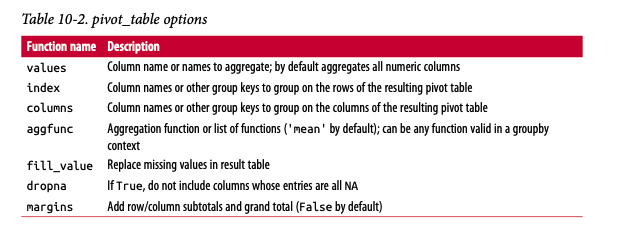

In [310]:
import pdfplumber
import pandas as pd

# Open the PDF file
with pdfplumber.open("/Users/saurabhverma/Downloads/NwSTbNri3Q.pdf") as pdf:
    # Initialize an empty list to store extracted tables
    tables = []
    
    # Extract tables from each page of the PDF
    for page in pdf.pages:
        # Extract table from the current page
        table = page.extract_table()
        if table:
            # Append the extracted table to the list
            tables.append(table)

# Convert the extracted tables into pandas DataFrames
dfs = [pd.DataFrame(table) for table in tables]

# Now, dfs contains a list of pandas DataFrames, each DataFrame representing a table from the PDF
# You can further process or concatenate these DataFrames as needed


In [264]:
import pdfplumber
import pandas as pd

# Open the PDF file
with pdfplumber.open("/Users/saurabhverma/Downloads/JAt4Fk7jM7-2.pdf") as pdf:
    # Initialize an empty list to store extracted tables
    tables = []
    
    # Extract tables from each page of the PDF
    for page in pdf.pages:
        # Extract table from the current page
        table = page.extract_table()
        if table:
            # Append the extracted table to the list
            tables.append(table)

# Convert the extracted tables into pandas DataFrames
df_purchaser = [pd.DataFrame(table) for table in tables]

# Now, dfs contains a list of pandas DataFrames, each DataFrame representing a table from the PDF
# You can further process or concatenate these DataFrames as needed

In [278]:
# df_purchaser[1]

In [281]:
purchaser= pd.DataFrame(columns= ['date', 'company', 'amount'])
for df in df_purchaser:
    df.columns=['date', 'company', 'amount']
    purchaser=pd.concat([purchaser,df], axis=0)

purchaser.head()

,date,company,amount
0,Date of Purchase,Purchaser Name,Denomination
1,12/Apr/2019,A B C INDIA LIMITED,"1,00,000"
2,12/Apr/2019,A B C INDIA LIMITED,"1,00,000"
3,12/Apr/2019,A B C INDIA LIMITED,"10,00,000"
4,12/Apr/2019,A B C INDIA LIMITED,"10,00,000"


In [284]:
purchaser.columns= purchaser.iloc[0]

purchaser.head()


,Date of Purchase,Purchaser Name,Denomination
0,Date of Purchase,Purchaser Name,Denomination
1,12/Apr/2019,A B C INDIA LIMITED,"1,00,000"
2,12/Apr/2019,A B C INDIA LIMITED,"1,00,000"
3,12/Apr/2019,A B C INDIA LIMITED,"10,00,000"
4,12/Apr/2019,A B C INDIA LIMITED,"10,00,000"


In [285]:
purchaser= purchaser.drop(0)

In [289]:
purchaser['Denomination']= purchaser['Denomination'].str.replace(",", "").astype(int)

In [290]:
purchaser.head()

,Date of Purchase,Purchaser Name,Denomination
1,12/Apr/2019,A B C INDIA LIMITED,100000
2,12/Apr/2019,A B C INDIA LIMITED,100000
3,12/Apr/2019,A B C INDIA LIMITED,1000000
4,12/Apr/2019,A B C INDIA LIMITED,1000000
5,12/Apr/2019,A B C INDIA LIMITED,100000


In [303]:
purchaser.groupby('Purchaser Name')['Denomination'].sum().sort_values(ascending=False).head(15)

Purchaser Name
FUTURE GAMING AND HOTEL SERVICES PR               11870000000
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     8080000000
QWIKSUPPLYCHAINPRIVATELIMITED                      4020000000
HALDIA ENERGY LIMITED                              3690000000
VEDANTA LIMITED                                    3686400000
ESSEL MINING AND INDS LTD                          2214000000
WESTERN UP POWER TRANSMISSION COMPANY LI MITED     2170000000
KEVENTER FOODPARK INFRA LIMITED                    1920000000
MADANLAL LTD.                                      1815000000
BHARTI AIRTEL LIMITED                              1790000000
YASHODA SUPER SPECIALITY HOSPITAL                  1580000000
UTKAL ALUMINA INTERNATIONAL LIMITED                1343000000
MKJ ENTERPRISES LIMITED                            1271400000
DLF COMMERCIAL DEVELOPERS LIMITED                  1270000000
JINDAL STEEL AND POWER LIMITED                     1210000000
Name: Denomination, dtype: int64

In [318]:
purchaser.groupby(['Purchaser Name','Denomination'])['Denomination'].count().sort_values(ascending=False).head(15)

Purchaser Name                                  Denomination
FUTURE GAMING AND HOTEL SERVICES PR             10000000        1187
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  10000000         808
QWIKSUPPLYCHAINPRIVATELIMITED                   10000000         402
VEDANTA LIMITED                                 10000000         368
HALDIA ENERGY LIMITED                           10000000         367
ESSEL MINING AND INDS LTD                       10000000         220
WESTERN UP POWER TRANSMISSION COMPANY LI MITED  10000000         217
TRANSWAYS EXIM PRIVATE LIMITED                  1000000          202
KEVENTER FOODPARK INFRA LIMITED                 10000000         191
MADANLAL LTD.                                   10000000         180
BHARTI AIRTEL LIMITED                           10000000         179
YASHODA SUPER SPECIALITY HOSPITAL               10000000         158
UTKAL ALUMINA INTERNATIONAL LIMITED             10000000         134
V M SALGAOCAR CORPORATION PVT LTD         

In [323]:
purchaser.groupby(['Purchaser Name']).count().sort_values(by= 'Denomination' ,ascending=False)

,Date of Purchase,Denomination
Purchaser Name,,
FUTURE GAMING AND HOTEL SERVICES PR,1187,1187
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED,808,808
QWIKSUPPLYCHAINPRIVATELIMITED,402,402
HALDIA ENERGY LIMITED,387,387
VEDANTA LIMITED,378,378
...,...,...
SWETA ESTATES PVT LTD,1,1
DAMINI NATH,1,1
PENNAR RENEWABLES PVT LTD( NEW ERA,1,1


In [311]:
taker= pd.DataFrame(columns= ['date', 'taker', 'amount'])
for df in dfs:
    df.columns=['date', 'taker', 'amount']
    taker=pd.concat([taker,df], axis=0)

taker.head()

,date,taker,amount
0,Date of\nEncashment,Name of the Political Party,Denomination
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"1,00,00,000"
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"


In [312]:
taker.columns= taker.iloc[0]
taker.drop(0,inplace=True)
taker.head()

,Date of\nEncashment,Name of the Political Party,Denomination
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"1,00,00,000"
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
5,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"


In [313]:
taker['Denomination']= taker['Denomination'].str.replace(',','').astype(int)
taker.head()

,Date of\nEncashment,Name of the Political Party,Denomination
1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
5,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


In [316]:
taker.groupby('Name of the Political Party').sum(numeric_only=True).sort_values(ascending= False, by= 'Denomination')

,Denomination
Name of the Political Party,
BHARTIYA JANTA PARTY,59288681000
ALL INDIA TRINAMOOL CONGRESS,15743304000
"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",13961035000
BHARAT RASHTRA SAMITHI,11930389000
BIJU JANATA DAL,7602000000
DMK PARTY IN PARLIAMENT,6240000000
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,3287900000
TELUGU DESAM PARTY,2147800000
SHIVSENA (POLITICAL PARTY),1552613000
